# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [1]:
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
numtrials=10
d = datarun.Experiment(
    vstart = 6,
    vend = 15,
    vstep = 1, 
    idx_start = 168,
    datapath = os.path.join(os.getcwd(),'MOT_loading_time'),
    numtrials = numtrials,
    mask=0.1
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:159: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:159: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


|████████████████████████████████████████| 100/100 [100%] in 2:30.1 (0.66/s)                                            


# LOADING DYNAMICS

In [ ]:
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))
N_list = d.structure_data(lambda d: d.atom_number_px_sum())

N_list_copy=N_list.copy()
stats_dict={key:(np.mean(N_list_copy[key].copy()),np.std(N_list_copy[key].copy())) for key in N_list_copy.keys()}
for key in N_list_copy.keys():
    # copy_list=N_list[key].copy()
    for i in range(len(N_list_copy[key])):
        if N_list_copy[key][i]-2*stats_dict[key][1]>stats_dict[key][0] or N_list_copy[key][i]+2*stats_dict[key][1]<stats_dict[key][0]:
            N_list_copy[key][i]=np.nan
y_plot=[np.nanmean(n) for n in N_list_copy.values()]
x_plot=list(N_list_copy.keys())
popt,pcov=curve_fit(loading_dyn,x_plot,y_plot,(1e8,1e-1))
print(popt)
xfit=np.linspace(min(x_plot),max(x_plot),10000)
yfit=loading_dyn(xfit,*popt)
plt.plot(xfit,yfit,'-b')
plt.plot(x_plot, y_plot, "xr")
# print([stats_dict[key][1] for key in x_plot])
plt.errorbar(x_plot, y_plot, [np.nanstd(N_list_copy[key]) for key in x_plot],ls='none',color='r')
for key in N_list_copy.keys():
    plt.plot([key]*len(N_list_copy[key]),N_list_copy[key],'.r')

# NUM VS WIDTH

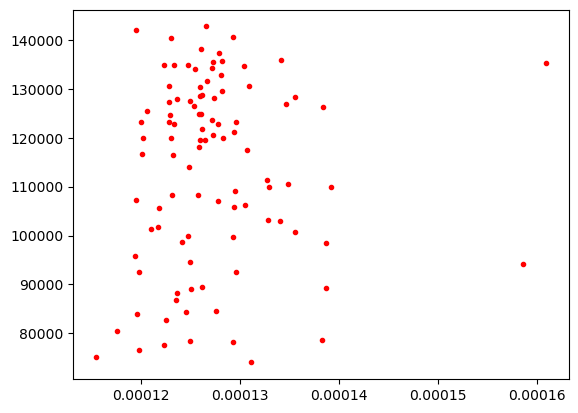

In [7]:
plt.figure()
plt.plot([0.5*(datum.popt_x[2]+datum.popt_y[2]) for datum in d.data],[datum.atom_number_px_sum() for datum in d.data],'.r')
plt.show()

In [ ]:
for datum in d.data:
    datum.plot_blob()